In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression

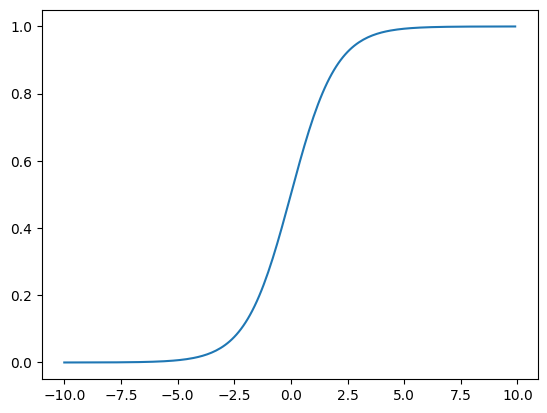

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-10, 10, 0.1)
y = sigmoid(x)
plt.plot(x, y)

In [3]:
data = datasets.load_iris()
df = pd.DataFrame(data["data"], columns=data["feature_names"]).drop(columns=["petal length (cm)"])
df.insert(2, "const", 1)
df["variety"] = data["target_names"][data["target"]]
df.insert(4, "setosa", df["variety"] == "setosa")

In [4]:
xcols = ["sepal length (cm)", "sepal width (cm)", "const"]
train, test = train_test_split(df, test_size=10, random_state=5)
test

,sepal length (cm),sepal width (cm),const,petal width (cm),setosa,variety
82,5.8,2.7,1,1.2,False,versicolor
134,6.1,2.6,1,1.4,False,virginica
114,5.8,2.8,1,2.4,False,virginica
42,4.4,3.2,1,0.2,True,setosa
109,7.2,3.6,1,2.5,False,virginica
57,4.9,2.4,1,1.0,False,versicolor
1,4.9,3.0,1,0.2,True,setosa
70,5.9,3.2,1,1.8,False,versicolor
25,5.0,3.0,1,0.2,True,setosa
84,5.4,3.0,1,1.5,False,versicolor


## Overview

1. regression for petal width
2. binary classification for setosa: T/F
3. binary classification for setosa: prob(T)
4. multi-class classification for variety

In [5]:
# predict: petal width
xcols = ["sepal length (cm)", "sepal width (cm)", "const"]
reg = LinearRegression(fit_intercept=False)
reg.fit(train[xcols], train["petal width (cm)"])
test["prediction"] = reg.predict(test[xcols])
test

,sepal length (cm),sepal width (cm),const,petal width (cm),setosa,variety,prediction
82,5.8,2.7,1,1.2,False,versicolor,1.327769
134,6.1,2.6,1,1.4,False,virginica,1.590835
114,5.8,2.8,1,2.4,False,virginica,1.279061
42,4.4,3.2,1,0.2,True,setosa,0.083889
109,7.2,3.6,1,2.5,False,virginica,1.889735
57,4.9,2.4,1,1.0,False,versicolor,0.830818
1,4.9,3.0,1,0.2,True,setosa,0.538569
70,5.9,3.2,1,1.8,False,versicolor,1.155681
25,5.0,3.0,1,0.2,True,setosa,0.610022
84,5.4,3.0,1,1.5,False,versicolor,0.895833


In [6]:
# predict: is it a setosa?
xcols = ["sepal length (cm)", "sepal width (cm)", "const"]
cls = LogisticRegression(fit_intercept=False)
cls.fit(train[xcols], train["setosa"])
test["prediction"] = cls.predict(test[xcols])
test

,sepal length (cm),sepal width (cm),const,petal width (cm),setosa,variety,prediction
82,5.8,2.7,1,1.2,False,versicolor,False
134,6.1,2.6,1,1.4,False,virginica,False
114,5.8,2.8,1,2.4,False,virginica,False
42,4.4,3.2,1,0.2,True,setosa,True
109,7.2,3.6,1,2.5,False,virginica,False
57,4.9,2.4,1,1.0,False,versicolor,False
1,4.9,3.0,1,0.2,True,setosa,True
70,5.9,3.2,1,1.8,False,versicolor,False
25,5.0,3.0,1,0.2,True,setosa,True
84,5.4,3.0,1,1.5,False,versicolor,False


In [7]:
cls.score(test[xcols], test["setosa"])

1.0

In [8]:
# [[False Prob, True Prob], ...]
cls.predict_proba(test[xcols]) # array of probality predictions

array([[0.9405628 , 0.0594372 ],
       [0.97972503, 0.02027497],
       [0.91463241, 0.08536759],
       [0.07056997, 0.92943003],
       [0.93345725, 0.06654275],
       [0.85227945, 0.14772055],
       [0.35722665, 0.64277335],
       [0.74147607, 0.25852393],
       [0.41451931, 0.58548069],
       [0.65092753, 0.34907247]])

In [9]:
test["prob_setosa"] = cls.predict_proba(test[xcols])[:, 1]
test

,sepal length (cm),sepal width (cm),const,petal width (cm),setosa,variety,prediction,prob_setosa
82,5.8,2.7,1,1.2,False,versicolor,False,0.059437
134,6.1,2.6,1,1.4,False,virginica,False,0.020275
114,5.8,2.8,1,2.4,False,virginica,False,0.085368
42,4.4,3.2,1,0.2,True,setosa,True,0.929430
109,7.2,3.6,1,2.5,False,virginica,False,0.066543
57,4.9,2.4,1,1.0,False,versicolor,False,0.147721
1,4.9,3.0,1,0.2,True,setosa,True,0.642773
70,5.9,3.2,1,1.8,False,versicolor,False,0.258524
25,5.0,3.0,1,0.2,True,setosa,True,0.585481
84,5.4,3.0,1,1.5,False,versicolor,False,0.349072


In [10]:
# predict: which of the 3 varieties is it?
xcols = ["sepal length (cm)", "sepal width (cm)", "const"]
mult = LogisticRegression(fit_intercept=False)
mult.fit(train[xcols], train["variety"])
test["prediction"] = mult.predict(test[xcols])
test

,sepal length (cm),sepal width (cm),const,petal width (cm),setosa,variety,prediction,prob_setosa
82,5.8,2.7,1,1.2,False,versicolor,versicolor,0.059437
134,6.1,2.6,1,1.4,False,virginica,virginica,0.020275
114,5.8,2.8,1,2.4,False,virginica,versicolor,0.085368
42,4.4,3.2,1,0.2,True,setosa,setosa,0.929430
109,7.2,3.6,1,2.5,False,virginica,virginica,0.066543
57,4.9,2.4,1,1.0,False,versicolor,versicolor,0.147721
1,4.9,3.0,1,0.2,True,setosa,setosa,0.642773
70,5.9,3.2,1,1.8,False,versicolor,versicolor,0.258524
25,5.0,3.0,1,0.2,True,setosa,setosa,0.585481
84,5.4,3.0,1,1.5,False,versicolor,versicolor,0.349072


In [11]:
mult.score(test[xcols], test["variety"])

0.9

In [12]:
X = test[xcols].values
X

array([[5.8, 2.7, 1. ],
       [6.1, 2.6, 1. ],
       [5.8, 2.8, 1. ],
       [4.4, 3.2, 1. ],
       [7.2, 3.6, 1. ],
       [4.9, 2.4, 1. ],
       [4.9, 3. , 1. ],
       [5.9, 3.2, 1. ],
       [5. , 3. , 1. ],
       [5.4, 3. , 1. ]])

In [13]:
reg.coef_.reshape(-1,1)

array([[ 0.71452794],
       [-0.48708032],
       [-1.5013766 ]])

In [14]:
# PREDICT: math for linear regression
X @ reg.coef_.reshape(-1,1)

array([[1.32776857],
       [1.59083498],
       [1.27906054],
       [0.0838893 ],
       [1.8897354 ],
       [0.83081752],
       [0.53856933],
       [1.15568121],
       [0.61002213],
       [0.8958333 ]])

In [15]:
cls.coef_.T

array([[-2.42108094],
       [ 3.90002306],
       [ 0.75064911]])

In [16]:
X @ cls.coef_.T   # negative => predict False, positive => predict True

array([[-2.76155804],
       [-3.87788463],
       [-2.37155574],
       [ 2.5779668 ],
       [-2.6410506 ],
       [-1.75259212],
       [ 0.58742172],
       [-1.05365461],
       [ 0.34531362],
       [-0.62311875]])

In [17]:
# PREDICT: what is the binary classification?
X @ cls.coef_.T > 0

array([[False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False]])

In [18]:
test

,sepal length (cm),sepal width (cm),const,petal width (cm),setosa,variety,prediction,prob_setosa
82,5.8,2.7,1,1.2,False,versicolor,versicolor,0.059437
134,6.1,2.6,1,1.4,False,virginica,virginica,0.020275
114,5.8,2.8,1,2.4,False,virginica,versicolor,0.085368
42,4.4,3.2,1,0.2,True,setosa,setosa,0.929430
109,7.2,3.6,1,2.5,False,virginica,virginica,0.066543
57,4.9,2.4,1,1.0,False,versicolor,versicolor,0.147721
1,4.9,3.0,1,0.2,True,setosa,setosa,0.642773
70,5.9,3.2,1,1.8,False,versicolor,versicolor,0.258524
25,5.0,3.0,1,0.2,True,setosa,setosa,0.585481
84,5.4,3.0,1,1.5,False,versicolor,versicolor,0.349072


In [19]:
# PREDICT: what is probability of True for the binary classification?
sigmoid(X @ cls.coef_.T)

array([[0.0594372 ],
       [0.02027497],
       [0.08536759],
       [0.92943003],
       [0.06654275],
       [0.14772055],
       [0.64277335],
       [0.25852393],
       [0.58548069],
       [0.34907247]])

In [20]:
# PREDICT: what is the variety
mult

LogisticRegression(fit_intercept=False)

In [21]:
# column of coefficients for each variety we want to predict
mult.coef_.T

array([[-1.80097204,  0.64875706,  1.15221498],
       [ 3.01989635, -1.46308696, -1.55680939],
       [ 0.69404974,  1.04354373, -1.73759347]])

In [22]:
mult.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [23]:
X @ mult.coef_.T[:, [0]]  # scores for mult.classes_[0] (in this case, setosa)

array([[-1.59786793],
       [-2.44014918],
       [-1.2958783 ],
       [ 2.43344109],
       [-1.40132207],
       [-0.88296201],
       [ 0.9289758 ],
       [-0.26801696],
       [ 0.7488786 ],
       [ 0.02848978]])

In [24]:
X @ mult.coef_.T[:, [1]]  # scores for versicolor

array([[ 0.85599987],
       [ 1.19693568],
       [ 0.70969118],
       [-0.78380349],
       [ 0.44748149],
       [ 0.71104461],
       [-0.16680757],
       [ 0.1893321 ],
       [-0.10193186],
       [ 0.15757096]])

In [25]:
X @ mult.coef_.T[:, [2]]  # scores for virginica

array([[ 0.74186806],
       [ 1.24321349],
       [ 0.58618712],
       [-1.6496376 ],
       [ 0.95384058],
       [ 0.1719174 ],
       [-0.76216824],
       [ 0.07868487],
       [-0.64694674],
       [-0.18606075]])

In [26]:
# MATRIX @ MATRIX
# NESTED LOOP: over every row of X, and every coefficient column of mult.coef_.T
X @ mult.coef_.T

array([[-1.59786793,  0.85599987,  0.74186806],
       [-2.44014918,  1.19693568,  1.24321349],
       [-1.2958783 ,  0.70969118,  0.58618712],
       [ 2.43344109, -0.78380349, -1.6496376 ],
       [-1.40132207,  0.44748149,  0.95384058],
       [-0.88296201,  0.71104461,  0.1719174 ],
       [ 0.9289758 , -0.16680757, -0.76216824],
       [-0.26801696,  0.1893321 ,  0.07868487],
       [ 0.7488786 , -0.10193186, -0.64694674],
       [ 0.02848978,  0.15757096, -0.18606075]])

In [27]:
mult.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [28]:
# ASIDE: max and argmax (min and argmin work similarly)
a = np.array([1,2,9,7,8])
a

array([1, 2, 9, 7, 8])

In [29]:
a.max()

9

In [30]:
a.argmax() # index of the biggest number

2

In [31]:
(X @ mult.coef_.T).argmax(axis=1)

array([1, 2, 1, 0, 2, 1, 0, 1, 0, 1])

In [32]:
mult.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [33]:
mult.classes_[[0,0,0,2,1]]

array(['setosa', 'setosa', 'setosa', 'virginica', 'versicolor'],
      dtype=object)

In [34]:
mult.classes_[(X @ mult.coef_.T).argmax(axis=1)]

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'setosa', 'versicolor'],
      dtype=object)

In [35]:
test

,sepal length (cm),sepal width (cm),const,petal width (cm),setosa,variety,prediction,prob_setosa
82,5.8,2.7,1,1.2,False,versicolor,versicolor,0.059437
134,6.1,2.6,1,1.4,False,virginica,virginica,0.020275
114,5.8,2.8,1,2.4,False,virginica,versicolor,0.085368
42,4.4,3.2,1,0.2,True,setosa,setosa,0.929430
109,7.2,3.6,1,2.5,False,virginica,virginica,0.066543
57,4.9,2.4,1,1.0,False,versicolor,versicolor,0.147721
1,4.9,3.0,1,0.2,True,setosa,setosa,0.642773
70,5.9,3.2,1,1.8,False,versicolor,versicolor,0.258524
25,5.0,3.0,1,0.2,True,setosa,setosa,0.585481
84,5.4,3.0,1,1.5,False,versicolor,versicolor,0.349072


# Visualize Decision Boundaries

In [36]:
import matplotlib.pyplot as plt
import numpy as np

In [37]:
# np.meshgrid
# plt.contourf

In [38]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [39]:
X, Y = np.meshgrid(np.arange(10), np.arange(10)) # x and y range

In [40]:
print(X.shape)
print(Y.shape)

(10, 10)
(10, 10)


In [41]:
X # value in each cell is the x coordinate of that cell

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [42]:
Y

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
       [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
       [6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
       [7, 7, 7, 7, 7, 7, 7, 7, 7, 7],
       [8, 8, 8, 8, 8, 8, 8, 8, 8, 8],
       [9, 9, 9, 9, 9, 9, 9, 9, 9, 9]])

In [43]:
Z = X * Y
Z

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18],
       [ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27],
       [ 0,  4,  8, 12, 16, 20, 24, 28, 32, 36],
       [ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45],
       [ 0,  6, 12, 18, 24, 30, 36, 42, 48, 54],
       [ 0,  7, 14, 21, 28, 35, 42, 49, 56, 63],
       [ 0,  8, 16, 24, 32, 40, 48, 56, 64, 72],
       [ 0,  9, 18, 27, 36, 45, 54, 63, 72, 81]])

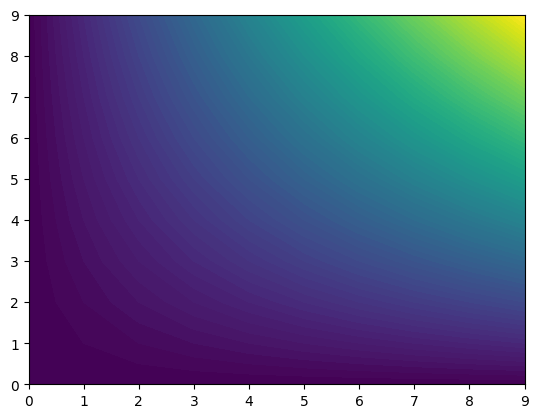

In [44]:
plt.contourf(X, Y, Z, levels=100)

In [45]:
sepw, sepl = np.meshgrid(np.arange(0,10,0.1), np.arange(0,10,0.1))
sepw

array([[0. , 0.1, 0.2, ..., 9.7, 9.8, 9.9],
       [0. , 0.1, 0.2, ..., 9.7, 9.8, 9.9],
       [0. , 0.1, 0.2, ..., 9.7, 9.8, 9.9],
       ...,
       [0. , 0.1, 0.2, ..., 9.7, 9.8, 9.9],
       [0. , 0.1, 0.2, ..., 9.7, 9.8, 9.9],
       [0. , 0.1, 0.2, ..., 9.7, 9.8, 9.9]])

In [46]:
# predictions = F(sepw, sepl)

In [50]:
predict_df = pd.DataFrame({
    "sepal length (cm)": sepl.reshape(-1),
    "sepal width (cm)": sepw.reshape(-1),
    "const": 1})
predict_df.head()

,sepal length (cm),sepal width (cm),const
0,0.0,0.0,1
1,0.0,0.1,1
2,0.0,0.2,1
3,0.0,0.3,1
4,0.0,0.4,1


In [52]:
cls.predict(predict_df).shape

(10000,)

In [53]:
print(sepl.shape)
print(sepw.shape)

(100, 100)
(100, 100)


<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

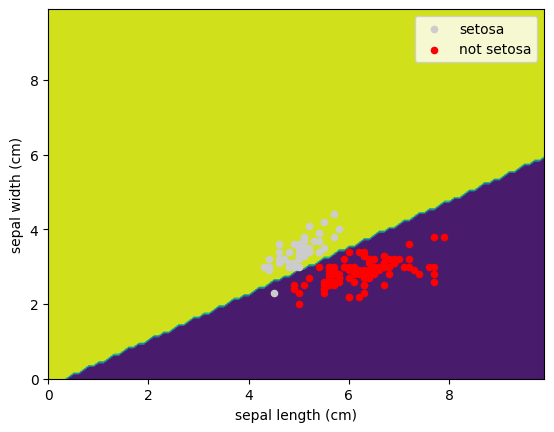

In [63]:
plt.contourf(sepl, sepw, cls.predict(predict_df).reshape(sepl.shape))
ax = plt.gca() # get current axes
df[df["setosa"]].plot.scatter(x="sepal length (cm)", y="sepal width (cm)", ax=ax, label="setosa", color="0.8")
df[~df["setosa"]].plot.scatter(x="sepal length (cm)", y="sepal width (cm)", ax=ax, label="not setosa", color="r")

In [64]:
cls.predict(predict_df)

array([ True,  True,  True, ...,  True,  True,  True])

In [71]:
classes_ = list(mult.classes_)
classes_.index("versicolor")

1

In [74]:
predictions = np.array([classes_.index(name) for name in mult.predict(predict_df)])
predictions

array([1, 0, 0, ..., 0, 0, 0])

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

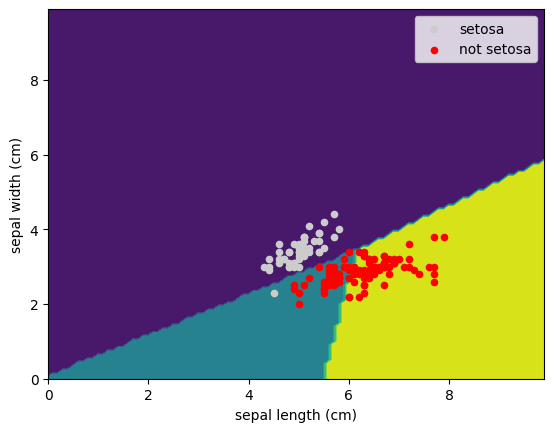

In [75]:
plt.contourf(sepl, sepw, predictions.reshape(sepl.shape))
ax = plt.gca() # get current axes
df[df["setosa"]].plot.scatter(x="sepal length (cm)", y="sepal width (cm)", ax=ax, label="setosa", color="0.8")
df[~df["setosa"]].plot.scatter(x="sepal length (cm)", y="sepal width (cm)", ax=ax, label="not setosa", color="r")
# TODO: label the colors, draw three scatters for the different varities

In [ ]:
# how will the lines look different if I use polynomial features in a pipeline before logistic regression?

In [85]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

model = Pipeline([
    ("pf", PolynomialFeatures(degree=5, include_bias=False)), # degree=5: x, x**2, x**3, x**4, x**5
    ("lr", LogisticRegression(fit_intercept=False)),
])
model

Pipeline(steps=[('pf', PolynomialFeatures(degree=5, include_bias=False)),
                ('lr', LogisticRegression(fit_intercept=False))])

In [86]:
model.fit(train[xcols], train["variety"])

/home/trh/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('pf', PolynomialFeatures(degree=5, include_bias=False)),
                ('lr', LogisticRegression(fit_intercept=False))])

In [87]:
predictions = np.array([classes_.index(name) for name in model.predict(predict_df)])
predictions

array([0, 0, 0, ..., 0, 0, 0])

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

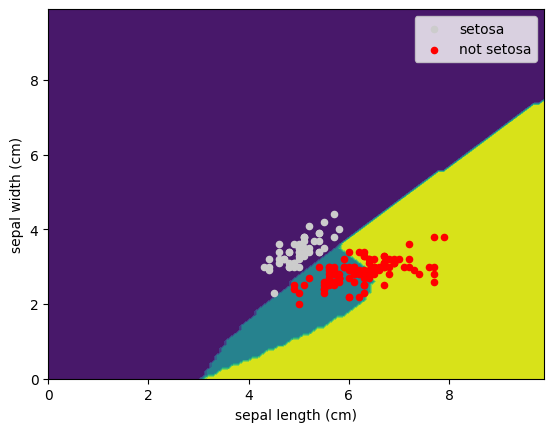

In [88]:
plt.contourf(sepl, sepw, predictions.reshape(sepl.shape))
ax = plt.gca() # get current axes
df[df["setosa"]].plot.scatter(x="sepal length (cm)", y="sepal width (cm)", ax=ax, label="setosa", color="0.8")
df[~df["setosa"]].plot.scatter(x="sepal length (cm)", y="sepal width (cm)", ax=ax, label="not setosa", color="r")
# TODO: label the colors, draw three scatters for the different varities

In [ ]:
# LogisticRegression is an iterative algorithm

# FIRST: choose random coefficients
# LOOP (some number of iterations/epochs)
#     we try to make the coefficients a little better
#     if accuracy isn't improving, stop early

In [103]:
# solution 1
model = Pipeline([
    ("pf", PolynomialFeatures(degree=5, include_bias=False)),
    ("lr", LogisticRegression(fit_intercept=False, max_iter=1000)),
])
model.fit(train[xcols], train["variety"])

Pipeline(steps=[('pf', PolynomialFeatures(degree=5, include_bias=False)),
                ('lr', LogisticRegression(fit_intercept=False, max_iter=1000))])

In [104]:
# solution 2: scale the data
# LogisticRegression likes features:
# 1. "small"
# 2. "centered" (the average of the column is 0)

In [105]:
a = np.array([1,2,8,9])
a

array([1, 2, 8, 9])

In [107]:
a / a.std()

array([0.28284271, 0.56568542, 2.2627417 , 2.54558441])

In [110]:
# LogisticRegression will work better/faster with data like this:
(a - a.mean()) / a.std()

array([-1.13137085, -0.84852814,  0.84852814,  1.13137085])

In [114]:
from sklearn.preprocessing import StandardScaler
StandardScaler().fit_transform(a.reshape(-1,1))

array([[-1.13137085],
       [-0.84852814],
       [ 0.84852814],
       [ 1.13137085]])

# Advice: always use StandardScaler before LogisticRegression

In [116]:
# solution 1
model = Pipeline([
    ("pf", PolynomialFeatures(degree=5, include_bias=False)),
    ("std", StandardScaler()),
    ("lr", LogisticRegression(fit_intercept=False)),
])
model.fit(train[xcols], train["variety"])

Pipeline(steps=[('pf', PolynomialFeatures(degree=5, include_bias=False)),
                ('std', StandardScaler()),
                ('lr', LogisticRegression(fit_intercept=False))])

In [117]:
# ADVICE: PolynomialFeatures should be before StandardScaler if you're using both

In [118]:
a

array([1, 2, 8, 9])

In [119]:
scaled = (a - a.mean()) / a.std() # like StandardScaler
scaled

array([-1.13137085, -0.84852814,  0.84852814,  1.13137085])

In [120]:
scaled ** 2 # like PolynomialFeatures

array([1.28, 0.72, 0.72, 1.28])